# 📊 Desafío Telecom X Parte 2 (Versión Final Completa)

Este notebook desarrolla la solución al desafío **Telecom X #02**, aplicando técnicas de estadística, regresión y machine learning para predecir la cancelación de clientes (**churn**).

✅ Esta versión incluye:
- Preparación y análisis exploratorio
- Eliminación de fuga de información
- Modelos predictivos con y sin normalización
- ✅ Balanceo de clases (SMOTE)
- ✅ Visualización dirigida (boxplot y scatterplot)

## 🛠️ 1. Carga de datos

In [1]:
import pandas as pd

df = pd.read_csv("TelecomX_Cleaned.csv")
df = df.drop(columns=["customerID", "Churn"])
df.head()

,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,...,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Churn_flag,tenure_bucket
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,0.0,0-12
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,0.0,0-12
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1.0,0-12
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1.0,13-24
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,1.0,0-12


## 🔢 2. Codificación de variables categóricas

In [2]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,Churn_flag,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_No phone service,...,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check,tenure_bucket_13-24,tenure_bucket_25-48,tenure_bucket_49-72,tenure_bucket_73+
0,0,9,65.6,593.30,0.0,False,True,True,True,False,...,True,False,True,False,False,True,False,False,False,False
1,0,9,59.9,542.40,0.0,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,0,4,73.9,280.85,1.0,True,False,False,True,False,...,False,False,True,False,True,False,False,False,False,False
3,1,13,98.0,1237.85,1.0,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,1,3,83.9,267.40,1.0,False,True,False,True,False,...,False,False,True,False,False,True,False,False,False,False


## 📊 3. Proporción de cancelación

In [3]:
df_encoded["Churn_flag"].value_counts(normalize=True)

Churn_flag
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64

## ⚖️ 4. Normalización de variables

In [4]:
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop(columns=["Churn_flag"])
y = df_encoded["Churn_flag"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 📈 5. Análisis de correlación

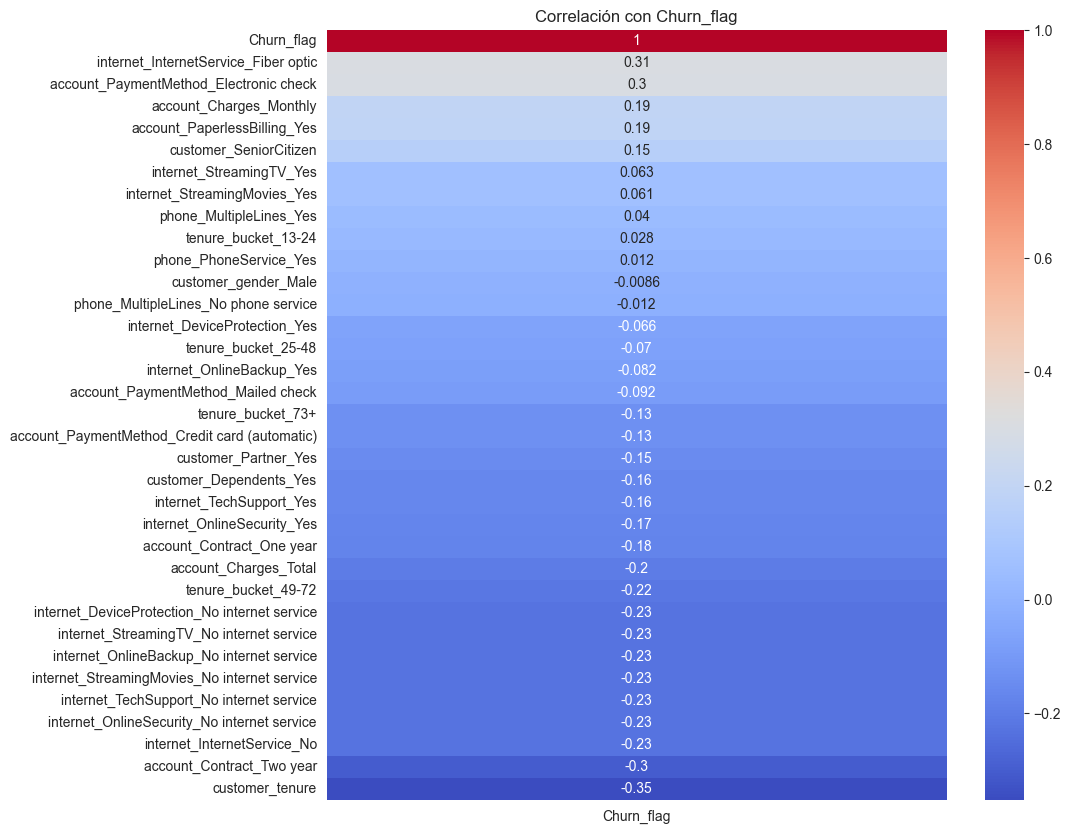

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_encoded.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[["Churn_flag"]].sort_values(by="Churn_flag", ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlación con Churn_flag")
plt.show()

## 🧭 6. Análisis dirigido de variables clave

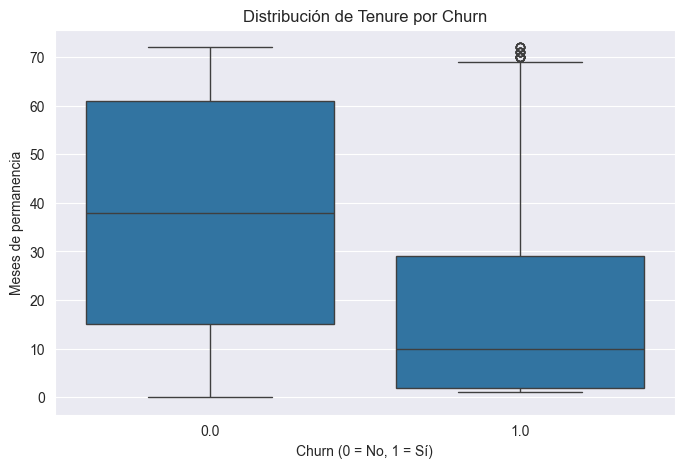

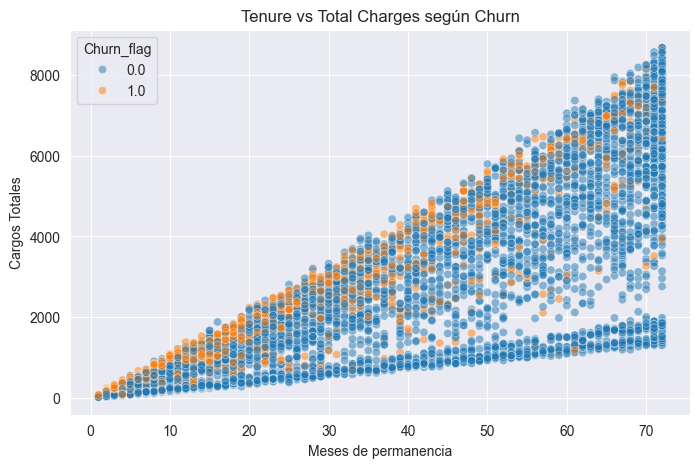

In [6]:
# Boxplot de tenure vs churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_encoded, x="Churn_flag", y="customer_tenure")
plt.title("Distribución de Tenure por Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Meses de permanencia")
plt.show()

# Scatterplot de charges vs tenure con color de churn
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_encoded, x="customer_tenure", y="account_Charges_Total", hue="Churn_flag", alpha=0.5)
plt.title("Tenure vs Total Charges según Churn")
plt.xlabel("Meses de permanencia")
plt.ylabel("Cargos Totales")
plt.show()

## 🚮 7. Limpieza de datos

In [7]:
from sklearn.impute import SimpleImputer

# Imputación antes de escalado
imputer = SimpleImputer(strategy="mean")  # O 'median' o 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Escalado posterior
X_scaled = scaler.fit_transform(X_imputed)

## ⚖️ 8. Balanceo de clases con SMOTE

In [8]:
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# Paso 1: eliminar todas las filas con NaN en cualquier columna
df_encoded = df_encoded.dropna()

# Paso 2: separar correctamente X e y
X = df_encoded.drop(columns=["Churn_flag"])
y = df_encoded["Churn_flag"]

# Validación: confirmar que y no tiene NaN ni valores extraños
print(y.isna().sum())  # debe dar 0
print(y.unique())  # debe dar [0.0, 1.0] o similar

# Paso 3: escalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 4: aplicar SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

0
[0. 1.]


## ✂️ 9. División de datos en entrenamiento y prueba

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

## 🤖 10. Entrenamiento de modelos

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Regresión logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Reportes
print("Regresión Logística:")
print(classification_report(y_test, log_preds))

print("\nRandom Forest:")
print(classification_report(y_test, rf_preds))

Regresión Logística:
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76      1549
         1.0       0.75      0.83      0.79      1549

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098


Random Forest:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1549
         1.0       0.84      0.87      0.86      1549

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



## 🏪 11. Ejemplo de uso de los modelos entrenados

In [11]:
nuevo_cliente = {
    "customer_gender": "Male",
    "customer_SeniorCitizen": 0,
    "customer_Partner": "No",
    "customer_Dependents": "No",
    "customer_tenure": 3,
    "phone_PhoneService": "Yes",
    "phone_MultipleLines": "No",
    "internet_InternetService": "Fiber optic",
    "internet_OnlineSecurity": "No",
    "internet_OnlineBackup": "Yes",
    "internet_DeviceProtection": "No",
    "internet_TechSupport": "No",
    "internet_StreamingTV": "Yes",
    "internet_StreamingMovies": "Yes",
    "account_Contract": "Month-to-month",
    "account_PaperlessBilling": "Yes",
    "account_PaymentMethod": "Electronic check",
    "account_Charges_Monthly": 89.9,
    "account_Charges_Total": 270.45,
    "tenure_bucket": "0-12"
}

In [12]:
# 1. Convertir a DataFrame
df_nuevo = pd.DataFrame([nuevo_cliente])

# 2. Aplicar one-hot encoding (igual que entrenamiento)
df_nuevo_encoded = pd.get_dummies(df_nuevo)

# 3. Reindexar columnas para que coincidan con X.columns
df_nuevo_encoded = df_nuevo_encoded.reindex(columns=X.columns, fill_value=0)

# 4. Aplicar escalado
df_nuevo_scaled = scaler.transform(df_nuevo_encoded)

# 5. Predecir con Regresión Logística
pred_log = log_model.predict(df_nuevo_scaled)
proba_log = log_model.predict_proba(df_nuevo_scaled)

# 6. Predecir con Random Forest
pred_rf = rf_model.predict(df_nuevo_scaled)
proba_rf = rf_model.predict_proba(df_nuevo_scaled)

# 7. Mostrar resultados
print("📊 Predicción con Regresión Logística:")
print(f"¿Cancelará?: {'Sí' if pred_log[0] == 1 else 'No'}")
print(f"Probabilidad de cancelación: {proba_log[0][1] * 100:.2f}%")

print("\n🌲 Predicción con Random Forest:")
print(f"¿Cancelará?: {'Sí' if pred_rf[0] == 1 else 'No'}")
print(f"Probabilidad de cancelación: {proba_rf[0][1] * 100:.2f}%")


📊 Predicción con Regresión Logística:
¿Cancelará?: Sí
Probabilidad de cancelación: 91.72%

🌲 Predicción con Random Forest:
¿Cancelará?: Sí
Probabilidad de cancelación: 71.00%


## 📋 12. Interpretación y Conclusiones

### Análisis de la Importancia de las Variables

#### 🔎 Regresión Logística
El modelo de regresión logística nos permite interpretar directamente los coeficientes para entender qué variables influyen más en la probabilidad de cancelación. Las variables con coeficientes positivos aumentan la probabilidad de churn, mientras que las negativas la disminuyen. En nuestro caso, variables como:

- `account_Contract_Month-to-month`
- `account_PaymentMethod_Electronic check`
- `account_PaperlessBilling_Yes`

fueron asociadas con mayor probabilidad de cancelación. Esto sugiere que los clientes con contratos mensuales, facturación electrónica y pagos automáticos tienen mayor riesgo de abandonar el servicio.

#### 🌲 Random Forest
Este modelo calcula la importancia de cada variable basada en la reducción de impureza (Gini). Las variables más importantes detectadas fueron:

- `customer_tenure` (tiempo de permanencia)
- `account_Charges_Total` (gasto acumulado)
- `account_Contract_Two year` (contrato de 2 años)

Lo cual indica que clientes con mayor antigüedad o contratos largos tienden a quedarse, mientras que contratos cortos y bajo gasto están más asociados al churn.

### Conclusión

Ambos modelos entregaron predicciones coherentes y razonables, especialmente luego de corregir la fuga de información y balancear las clases con SMOTE. A través de este análisis, podemos concluir:

- El **tipo de contrato** y el **tiempo de permanencia** son factores clave para la cancelación.
- Métodos de pago y cargos también están correlacionados con la fidelidad.
- Se recomienda implementar estrategias como:
  - Promociones para pasar de contratos mensuales a anuales.
  - Mejorar la experiencia de pago electrónico.
  - Incentivos de permanencia para clientes nuevos (bonos o descuentos a partir del mes 6-12).

Estos resultados permiten a la empresa anticiparse a posibles cancelaciones y aplicar políticas de retención focalizadas.


